In [1]:
import pandas as pd

import matplotlib
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('8.csv')
df.shape

(9673, 2)

In [3]:
df.head()

,Time,domain
0,2022-04-12 23:39:36,localhost:8888
1,2022-04-12 23:39:31,localhost:8888
2,2022-04-12 23:39:25,localhost:8888
3,2022-04-12 23:39:23,localhost:8888
4,2022-04-12 23:38:43,localhost:8888


In [4]:
df.tail()

,Time,domain
9668,2022-01-19 10:58:24,www.primevideo.com
9669,2022-01-19 10:58:24,www.primevideo.com
9670,2022-01-19 10:58:24,www.amazon.com
9671,2022-01-16 11:14:27,www.cowin.gov.in
9672,2022-01-13 01:33:34,webauth.umbc.edu


In [5]:
df.isna().sum()

Time      0
domain    0
dtype: int64

In [6]:
df.dropna( inplace=True)

In [7]:
# time column is string and string date is starting with YYYY, so I can do string compares
sum(df['Time'] < '1900') 

0

In [8]:
# I filter and get a copy, so I will not work on a slice, this will be a new dataframe. (essentially losing 1900 data points)
df = df[df.Time > '1900'].copy() 

In [9]:
df['Time'] = pd.to_datetime(df['Time'])

In [10]:
# df['domain'] = df['domain'].astype(str)

In [11]:
df.dtypes

Time      datetime64[ns]
domain            object
dtype: object

In [12]:
df.head()

,Time,domain
0,2022-04-12 23:39:36,localhost:8888
1,2022-04-12 23:39:31,localhost:8888
2,2022-04-12 23:39:25,localhost:8888
3,2022-04-12 23:39:23,localhost:8888
4,2022-04-12 23:38:43,localhost:8888


In [13]:
df.head()

,Time,domain
0,2022-04-12 23:39:36,localhost:8888
1,2022-04-12 23:39:31,localhost:8888
2,2022-04-12 23:39:25,localhost:8888
3,2022-04-12 23:39:23,localhost:8888
4,2022-04-12 23:38:43,localhost:8888


In [14]:
df['domain'].value_counts()[:50] 

www.google.com                      2006
www.amazon.com                       653
mail.google.com                      468
blackboard.umbc.edu                  378
github.com                           347
www.youtube.com                      334
photos.google.com                    248
webauth.umbc.edu                     203
secure.bankofamerica.com             191
umbc-csm.symplicity.com              157
www.amazon.in                        153
localhost:8888                       121
accounts.google.com                  118
my3.my.umbc.edu                      113
csprd-web.ps.umbc.edu                103
stackoverflow.com                     91
www.ubereats.com                      80
my.umbc.edu                           79
www.netflix.com                       72
umbc.coursearc.com                    71
www.hulu.com                          64
myaccount.google.com                  64
commerce.cashnet.com                  55
www.primevideo.com                    54
www.linkedin.com

<AxesSubplot:>

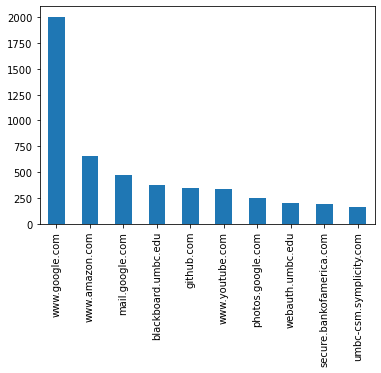

In [15]:
# top 10 sites that I visisted
df['domain'].value_counts()[:10].plot(kind='bar')


In [16]:
hourly_counts = df.groupby(df.Time.dt.hour).domain.size()
hourly_counts

Time
0     830
1     343
2     133
3      21
5       5
7       8
8      73
9     238
10    356
11    372
12    605
13    489
14    452
15    538
16    384
17    625
18    605
19    877
20    705
21    724
22    388
23    902
Name: domain, dtype: int64

<AxesSubplot:xlabel='Time'>

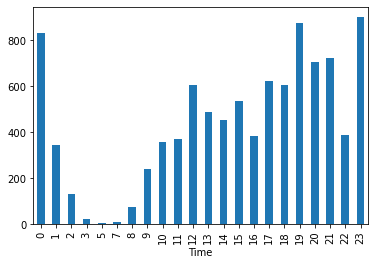

In [17]:
hourly_counts.plot.bar()

In [18]:
df['Day'] = [ d.day_name() for d in df['Time']]
df['DayIndex'] = [ d.dayofweek for d in df['Time']]
df.head()

,Time,domain,Day,DayIndex
0,2022-04-12 23:39:36,localhost:8888,Tuesday,1
1,2022-04-12 23:39:31,localhost:8888,Tuesday,1
2,2022-04-12 23:39:25,localhost:8888,Tuesday,1
3,2022-04-12 23:39:23,localhost:8888,Tuesday,1
4,2022-04-12 23:38:43,localhost:8888,Tuesday,1


In [19]:
df['Day'].value_counts()

Thursday     1676
Wednesday    1587
Tuesday      1462
Monday       1424
Sunday       1406
Saturday     1135
Friday        983
Name: Day, dtype: int64

In [20]:
days_sorted = df['DayIndex'].value_counts().sort_index()
days_sorted

0    1424
1    1462
2    1587
3    1676
4     983
5    1135
6    1406
Name: DayIndex, dtype: int64

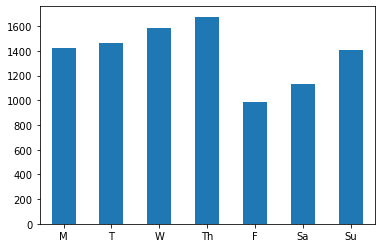

In [21]:
days_sorted.plot.bar()
plt.xticks(days_sorted.index, ['M', 'T', 'W','Th', 'F', 'Sa', 'Su'], rotation=0)

plt.show()

In [22]:
def is_weekend(day): 
    return day in ['Saturday', 'Sunday']


df['isWeekend'] = [ is_weekend(i) for i in df['Day']]
df.head()

,Time,domain,Day,DayIndex,isWeekend
0,2022-04-12 23:39:36,localhost:8888,Tuesday,1,False
1,2022-04-12 23:39:31,localhost:8888,Tuesday,1,False
2,2022-04-12 23:39:25,localhost:8888,Tuesday,1,False
3,2022-04-12 23:39:23,localhost:8888,Tuesday,1,False
4,2022-04-12 23:38:43,localhost:8888,Tuesday,1,False


In [23]:
weekend = df[ df['isWeekend'] == True ]

weekday = df[ df['isWeekend'] == False ]

In [24]:
weekend.head()

,Time,domain,Day,DayIndex,isWeekend
142,2022-04-10 22:41:02,www.ibomma.net,Sunday,6,True
143,2022-04-10 22:40:23,www.ibomma.net,Sunday,6,True
144,2022-04-10 09:28:28,www.amazon.in,Sunday,6,True
145,2022-04-10 00:06:09,mail.google.com,Sunday,6,True
146,2022-04-10 00:06:08,www.instacart.com,Sunday,6,True


In [25]:
weekday['domain'].value_counts()[:5]

www.google.com         1460
www.amazon.com          425
mail.google.com         340
blackboard.umbc.edu     253
photos.google.com       236
Name: domain, dtype: int64

In [26]:
weekend['domain'].value_counts()[:5]

www.google.com         546
www.amazon.com         228
github.com             141
mail.google.com        128
blackboard.umbc.edu    125
Name: domain, dtype: int64

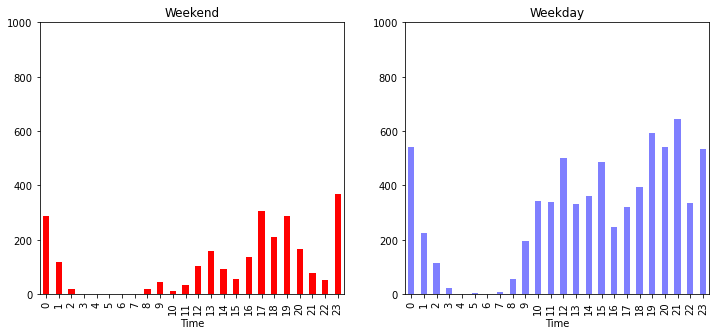

In [28]:
def show_stats(df, color, alpha=1, title='', fig=None):
    hourly_counts = df.groupby(df.Time.dt.hour).domain.size()
    
    # fill in the missing hours
    for h in range(24):
        if h not in hourly_counts:
            hourly_counts[h]=0 # I initially didn't do this and hours were not lining up
            
    if fig != None:
        plt.subplot(1,2, fig)
        
    hourly_counts.sort_index().plot.bar(color=color, alpha=alpha)
    plt.title(title)
    plt.ylim([0, 1000])
    

plt.figure(figsize=(12, 5))
show_stats( weekend, 'red', 1, 'Weekend', 1)
    
show_stats( weekday, 'blue', 0.5, 'Weekday', 2)

plt.show()

In [29]:
# be skeptical about your data!
# am I on computer a lot more on the weekdays 
# or it shows more simply because there are more weekdays 

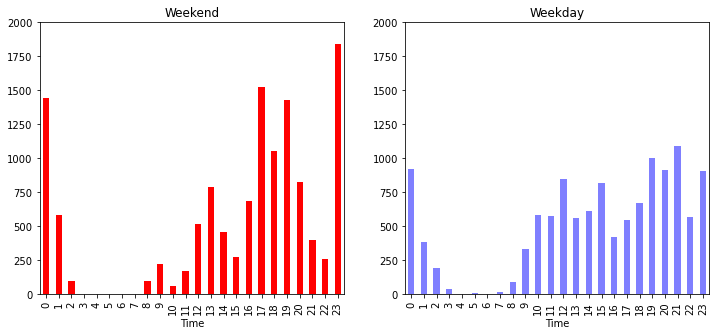

In [31]:
def show_stats(df, color, alpha=1, title='', fig=None, y_lim = None):
    hourly_counts = df.groupby(df.Time.dt.hour).domain.size()
    
    days_counts = df.Time.dt.date.nunique()
    
    # fill in the missing hours
    for h in range(24):
        if h not in hourly_counts:
            hourly_counts[h]=0 # I initially didn't do this and hours were not lining up
        else: 
            hourly_counts[h] = hourly_counts[h] * 100.0 /  days_counts # I multiplied by 100.0 to make it float and also not to loose decimals
           
    if fig != None:
        plt.subplot(1,2, fig)
        
    hourly_counts.sort_index().plot.bar(color=color, alpha=alpha, title=title)
    
    if y_lim != None:
        plt.ylim(y_lim)


plt.figure(figsize=(12, 5))

y_lim=[0, 2000]
show_stats(weekend, 'red', 1, 'Weekend',fig=1, y_lim=y_lim)
    
show_stats(weekday, 'blue', 0.5, 'Weekday',fig=2, y_lim=y_lim)

plt.show()

In [32]:
df['domain'].value_counts()[:10]

www.google.com              2006
www.amazon.com               653
mail.google.com              468
blackboard.umbc.edu          378
github.com                   347
www.youtube.com              334
photos.google.com            248
webauth.umbc.edu             203
secure.bankofamerica.com     191
umbc-csm.symplicity.com      157
Name: domain, dtype: int64

In [33]:
def get_data_for_domain(val):
    return df[df['domain'].str.lower().str.contains(val.lower(), regex=True)]

# get_data_for_domain('youtube')

In [34]:
def show_domain_stats(domain, color='blue', alpha=1):
    data = get_data_for_domain(domain)
    show_stats(data, color, alpha)
    return data

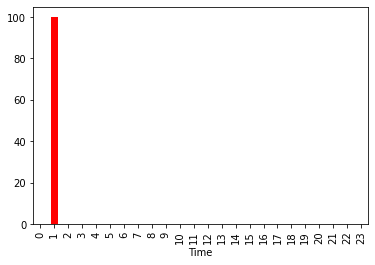

In [35]:
_ = show_domain_stats('instagram.com', 'red')

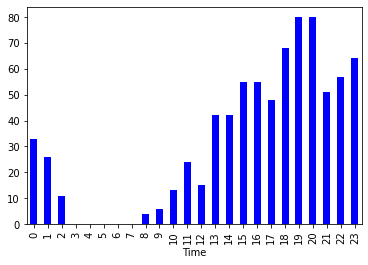

In [39]:
_= show_domain_stats('youtube.com', 'blue')

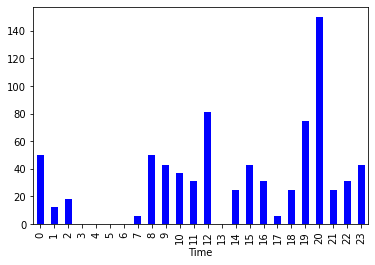

In [40]:
  
_= show_domain_stats('www.netflix.com|www.primevideo.com|www.hulu.com ', 'blue')

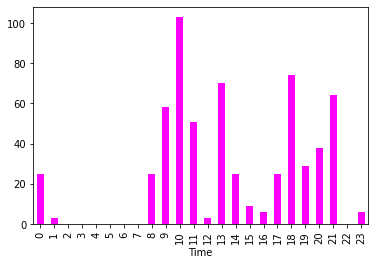

In [37]:
_= show_domain_stats('my.umbc.edu|my3.my.umbc.edu|blackboard.umbc.edu ', 'magenta')

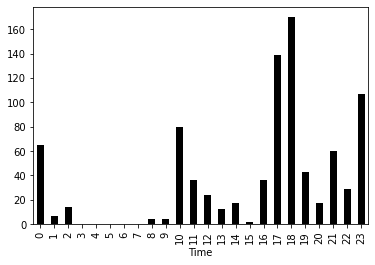

In [38]:
_ = show_domain_stats('github.com', 'black')

## Based on data, what can we tell about this person?
1. Is this a work computer/personal computer?
2. Is he/she employed?
3. What are his/her interests?
4. Anything interesting?

1. It is a personal computer
2. No, It seems that he/she is not employeed based on education websites, they might be a student.
3. This person is really interested in watching movies and series, as they have subscription in netflix, hulu, and prime video.
4. The interesting thing about this person is that he/she mostly browse UMBC website, and generally uses the computer late hours on the weekends. They prefer ordering food and groceries online that implies that he/she is a university student.